In [1]:
from Func_Col import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

In [2]:
def frac(x,pos):
    num = int(x*15)
    return fr"$\frac{{{num}}}{{15}}$" if num > 0 else "0"

In [3]:
val = []
for n in np.linspace(0, 1/3 , 1000):
    val.append(realign_log(rhob(n,generate_bell_states())))

In [4]:
e = [0,0,1]
momentum1 = [2,np.sqrt(3),0,0]
momentum2 = [2,-np.sqrt(3),0,0]
xi05 = 0.5
xi08 = 0.8
xi1 = 1

In [5]:
val_05 = realign_val_12_21(e,xi05,momentum1,momentum2)
val_08 = realign_val_12_21(e,xi08,momentum1,momentum2)
val_1 = realign_val_12_21(e,xi1,momentum1,momentum2)

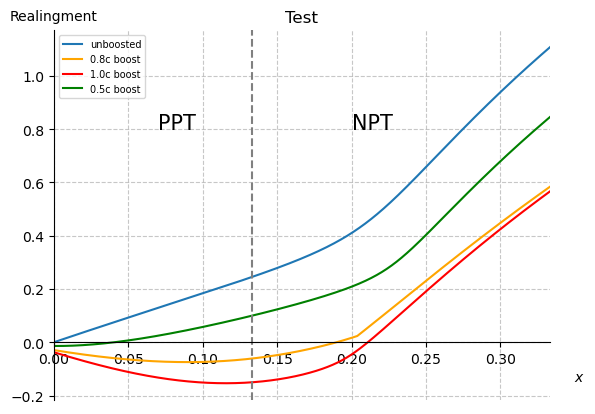

In [6]:
fig, ax = plt.subplots()
#ax.xlim(0,1/3)
#ax.ylim(-0.2)
ax.plot(np.linspace(0,1/3,1000), val, label = "unboosted")
ax.plot(np.linspace(0,1/3,1000), val_08, color = "orange", label="0.8c boost")
ax.plot(np.linspace(0,1/3,1000), val_1, color = "red",label="1.0c boost")
ax.plot(np.linspace(0,1/3,1000), val_05, color = "green",label="0.5c boost")
ax.axvline(2/15, linestyle = "--", color = "grey")
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=7)
ax.spines["bottom"].set_position(("data",0))
ax.set_xlim(0,max(np.linspace(0,1/3,1000)))
ax.set(title = "Test",
       xlabel=r"$x$")
ax.set_ylabel("Realingment",rotation = 0)
ax.xaxis.set_label_coords(1.06,0.08)
ax.yaxis.set_label_coords(0,1.02)
ax.text(0.07,0.8,"PPT",fontsize = 15)
ax.text(0.2,0.8,"NPT",fontsize = 15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.xaxis.set_major_locator(MultipleLocator(1/15))
#ax.xaxis.set_major_formatter(FuncFormatter(frac))

In [7]:
momhilbert1 = np.array([1,0])
momhilbert2 = np.array([0,1])

theta = 7*np.pi/5

valt_05 = realign_val_theta2(e,xi05,momentum1,momentum2,theta)
valt_08 = realign_val_theta2(e,xi08,momentum1,momentum2,theta)
valt_1 = realign_val_theta2(e,xi1,momentum1,momentum2,theta)

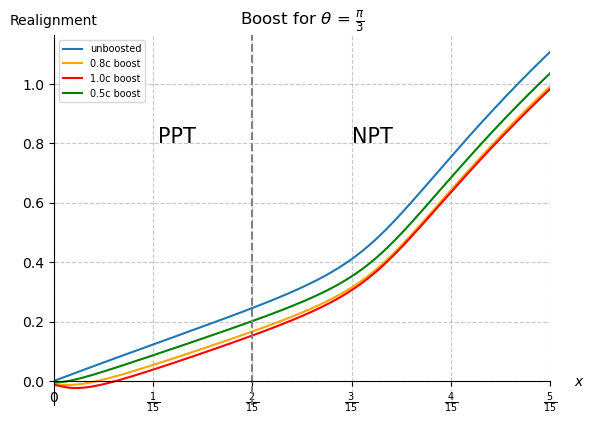

In [8]:
fig, ax = plt.subplots()
#ax.xlim(0,1/3)
#ax.ylim(-0.2)
ax.plot(np.linspace(0,1/3,1000), val, label = "unboosted")
ax.plot(np.linspace(0,1/3,1000), valt_08, color = "orange", label="0.8c boost")
ax.plot(np.linspace(0,1/3,1000), valt_1, color = "red",label="1.0c boost")
ax.plot(np.linspace(0,1/3,1000), valt_05, color = "green",label="0.5c boost")
ax.axvline(2/15, linestyle = "--", color = "grey")
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=7)
ax.spines["bottom"].set_position(("data",0))
ax.set_xlim(0,max(np.linspace(0,1/3,1000)))
ax.set(title = fr"Boost for $\theta$ = $\frac{{\pi}}{{3}}$",
       xlabel=r"$x$")
ax.set_ylabel("Realignment",rotation = 0)
ax.xaxis.set_label_coords(1.06,0.08)
ax.yaxis.set_label_coords(0,1.02)
ax.text(0.07,0.8,"PPT",fontsize = 15)
ax.text(0.2,0.8,"NPT",fontsize = 15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.xaxis.set_major_locator(MultipleLocator(1/15))
ax.xaxis.set_major_formatter(FuncFormatter(frac))

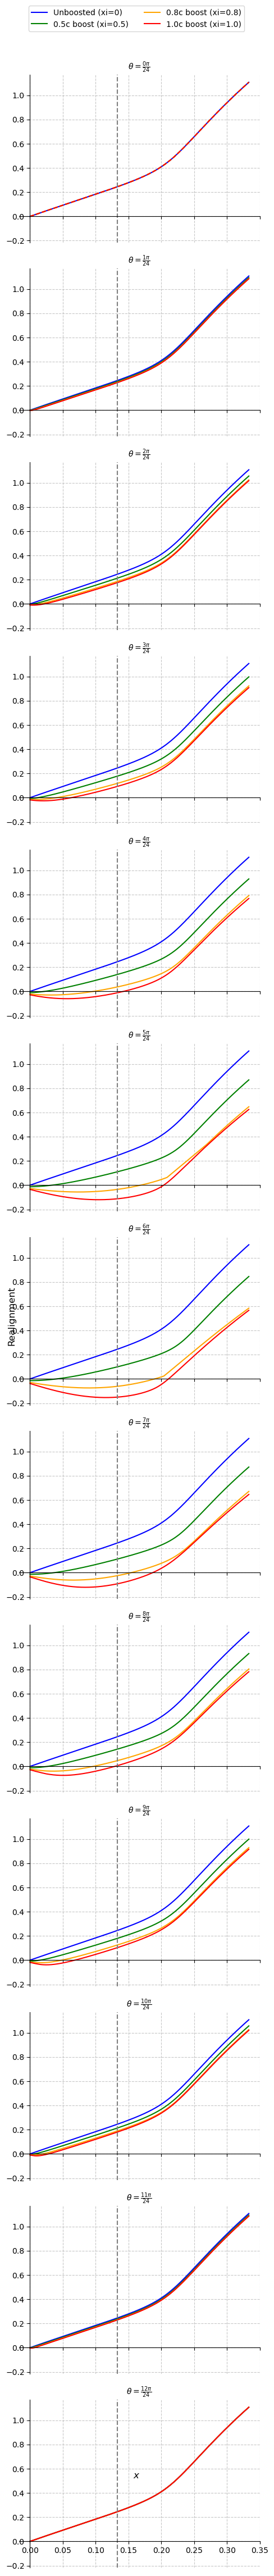

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

# Function to format axis ticks as fractions
def frac(x, pos):
    """Format axis ticks as fractions."""
    n, d = (2 * x).as_integer_ratio()  # Convert to fraction
    if d == 1:
        return f"${n}$"
    else:
        return f"${n}/{d}$"

# Energy and momentum example values
e = [0, 0, 1]  # Energy
momentum1 = np.array([2, np.sqrt(3), 0,0])  # Example momentum1
momentum2 = np.array([2, -np.sqrt(3), 0,0])  # Example momentum2
xi_values = [0.5, 0.8, 1.0]  # xi values

# Generate 10 values for theta
theta_values = np.linspace(0, np.pi/2, 13)
#theta_values = [5*np.pi/24,7*np.pi/24]
# Create subplots: 2 rows, 5 columns
fig, axes = plt.subplots(len(theta_values), 1, figsize=(5, 45), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

extract = []

# Loop over theta values and subplots
for i, theta in enumerate(theta_values):
    ax = axes[i]

    # Compute values for this theta and xi by calling the realign_val_theta2 function
    valt_05= realign_val_theta2(e, xi_values[0], momentum1, momentum2, theta)
    valt_08= realign_val_theta2(e, xi_values[1], momentum1, momentum2, theta)
    valt_1 = realign_val_theta2(e, xi_values[2], momentum1, momentum2, theta)

    extract.append([valt_05,valt_08,valt_1])
        
    # Plot the results for the various boosts
    ax.plot(np.linspace(0, 1/3, 1000), val, label=f"Unboosted (xi=0)", color="blue")
    ax.plot(np.linspace(0, 1/3, 1000), valt_05, label=f"0.5c boost (xi={xi_values[0]})", color="green", linestyle="--" if i == 0 else "-")
    ax.plot(np.linspace(0, 1/3, 1000), valt_08, label=f"0.8c boost (xi={xi_values[1]})", color="orange",linestyle="--" if i == 0 else "-")
    ax.plot(np.linspace(0, 1/3, 1000), valt_1, label=f"1.0c boost (xi={xi_values[2]})", color="red",linestyle="--" if i == 0 else "-")
    
    # Set title for this subplot
    ax.set_title(fr"$\theta = \frac{{{i}\pi}}{{24}}$", fontsize=10)

    # Customize the plot
    ax.grid(True, linestyle="--", alpha=0.7)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    ax.axvline(2/15, linestyle = "--", color = "grey")
    ax.spines["left"].set_position(("data",0))
    ax.spines["bottom"].set_position(("data",0))

# Add a single legend and labels for the figure
handles, labels = axes[12].get_legend_handles_labels()
#
fig.legend(handles, labels, loc="upper center", fontsize=10, ncol=2, bbox_to_anchor=(0.5, 1.02))

fig.text(0.5, 0.04, r"$x$", ha="center", fontsize=12)
fig.text(0.04, 0.5, "Realignment", va="center", rotation="vertical", fontsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
#extract: 13 = theta value, 3 = valt_05/08/1, 1000 = y value in plots
#can be used to plot subplots without plotting all the others
np.shape(extract) 

(13, 3, 1000)

In [10]:
psi = -np.pi/4
val_negative = realign_val_theta2(e,xi05,momentum1,momentum2,psi)

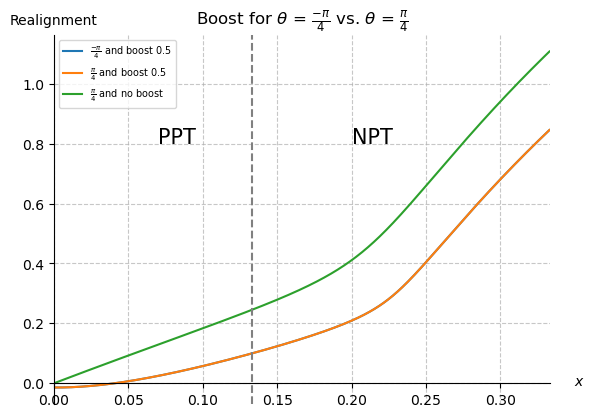

In [11]:
fig,ax = plt.subplots()
ax.plot(np.linspace(0,0.333,1000),val_negative,label=fr"$\frac{{-\pi}}{{4}}$ and boost 0.5")
ax.plot(np.linspace(0,0.333,1000),val_05,label=fr"$\frac{{\pi}}{{4}}$ and boost 0.5")
ax.plot(np.linspace(0,0.333,1000),val, label=fr"$\frac{{\pi}}{{4}}$ and no boost")
ax.axvline(2/15, linestyle = "--", color = "grey")
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=7)
ax.spines["bottom"].set_position(("data",0))
ax.set_xlim(0,max(np.linspace(0,1/3,1000)))
ax.set(title = fr"Boost for $\theta$ = $\frac{{-\pi}}{{4}}$ vs. $\theta$ = $\frac{{\pi}}{{4}}$",
       xlabel=r"$x$")
ax.set_ylabel("Realignment",rotation = 0)
ax.xaxis.set_label_coords(1.06,0.08)
ax.yaxis.set_label_coords(0,1.02)
ax.text(0.07,0.8,"PPT",fontsize = 15)
ax.text(0.2,0.8,"NPT",fontsize = 15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.xaxis.set_major_locator(MultipleLocator(1/15))
#ax.xaxis.set_major_formatter(FuncFormatter(frac))

In [12]:
e = [0,0,1]
momentum1 = [2,np.sqrt(3),0,0]
momentum2 = [2,-np.sqrt(3),0,0]

In [13]:
akl = np.array([
    [0,2/9,2/9],
    [0,2/9,1/18],
    [5/18,0,0]],
    dtype=np.complex128
)

bell_states = generate_bell_states()

def rho2spin(bell):
    sum = np.zeros(9,dtype=np.complex128)
    for k in range(3):
        for j in range(3):
            sum += akl[k][j]*bell[k][j]
    return sum

In [14]:
rho1 = rhob(7/60,bell_states)

In [15]:
k1 = np.array([1,0])
k2 = np.array([0,1])
k1k2 = np.kron(k1,k2)
rho2mom = np.outer(k1k2,k1k2)
rho2 = rho2spin(bell_states)

return 3d plot of realignment dependant of rapidity and probability values

In [16]:
values = []
ppt = []
mini = []
for x in np.arange(0.5985,0.602,0.00005):
    for i in np.linspace(0,1,10):
        rg = realign_general(e,x,momentum1,momentum2,rho1,rho2,(np.pi/4),0,i)[0]
        if rg < -1e-9:
            xnow = x
            inow = i
            print(f"now: x = {x},p = {i} with realignment = {rg}")
            pass
        values.append(rg)
    mini.append(min(values))
    values = []
#print(mini)
#print(values[0])

now: x = 0.6007999999999998,p = 0.1111111111111111 with realignment = -3.521058054720946e-07
now: x = 0.6008499999999998,p = 0.1111111111111111 with realignment = -3.0705998637141313e-06
now: x = 0.6008999999999998,p = 0.1111111111111111 with realignment = -5.789129446870409e-06
now: x = 0.6009499999999998,p = 0.1111111111111111 with realignment = -8.507694518933165e-06
now: x = 0.6009999999999998,p = 0.1111111111111111 with realignment = -1.1226295045015577e-05
now: x = 0.6010499999999998,p = 0.1111111111111111 with realignment = -1.3944930986546583e-05
now: x = 0.6010999999999997,p = 0.1111111111111111 with realignment = -1.666360230831847e-05
now: x = 0.6011499999999997,p = 0.1111111111111111 with realignment = -1.938230897592413e-05
now: x = 0.6011999999999997,p = 0.1111111111111111 with realignment = -2.2101050952713762e-05
now: x = 0.6012499999999997,p = 0.1111111111111111 with realignment = -2.4819828201716948e-05
now: x = 0.6012999999999997,p = 0.1111111111111111 with realignme

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go


# Create a grid of points
xi = np.linspace(0,1,50)
p = np.linspace(0,1,50)
xi, p = np.meshgrid(xi, p)

z = np.zeros_like(xi)

# Define the function to plot
for i in range(xi.shape[0]):
    for j in range(xi.shape[1]):
        z[i, j] = realign_general(e, xi[i, j], momentum1, momentum2, rho1, rho2, (np.pi / 4), 0, p[i, j])[0]

# Create a 3D plot
fig = go.Figure(data=[go.Surface(z=z, x=xi, y=p,colorscale= "turbo")])

plane_z = 0
plane_color = 'rgba(255, 0, 0, 0.5)'

fig.add_trace(go.Mesh3d(
    x=[xi.min(), xi.max(), xi.max(), xi.min()],
    y=[p.min(), p.min(), p.max(), p.max()],
    z=[plane_z, plane_z, plane_z, plane_z],
    color=plane_color,
    opacity=0.5,
    name='Plane'))

# Update layout for better visualization
fig.update_layout(
    title='Interactive 3D Surface Plot',
    height = 600,
    width = 800,
    scene=dict(
        xaxis=dict(
            title='rapidity xi',
            range=[xi.min(), xi.max()],  # Set the range for the x-axis
        ),
        yaxis=dict(
            title='probability p',
            range=[p.min(), p.max()],  # Set the range for the y-axis
        ),
        zaxis=dict(
            title='realignment',
            range=[z.min(), z.max()],  # Set the range for the z-axis
        ),
        aspectmode='manual',  # Manually set aspect ratio
        aspectratio=dict(x=1, y=1, z=1)
))

# Show the plot
fig.show()

In [18]:
print(xnow,inow)

0.6019499999999997 0.2222222222222222


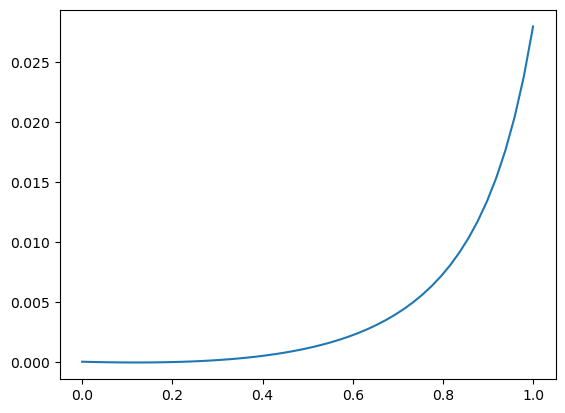

In [19]:
r = []
l = np.linspace(0,1,50)
for i in l:
    r.append(realign_general(e,xnow,momentum1,momentum2,rho1,rho2,(np.pi/4),0,i)[0])

plt.plot(l,r)


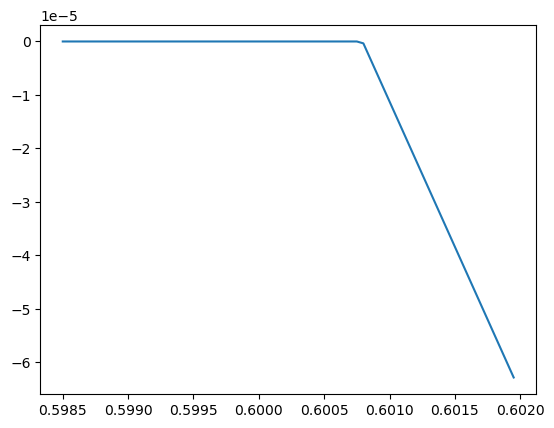

In [20]:
x=np.arange(0.5985,0.602,0.00005)
plt.plot(x,mini)

#plt.vlines(0.6,-0.14,0.002,colors="red",linestyles="--")

In [ ]:
D(e,0,momentum1)

array([[1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j]])

In [ ]:
#split up function realign_val so that i can still get the boosted density matrix
#define a 2. function that computes the values of realign. basically last part of realign_val